In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
liver_df = pd.read_csv('Liver-disease.csv', encoding= 'unicode_escape')

In [3]:
liver_df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
liver_df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [5]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [6]:
liver_df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Check null values

In [7]:
liver_df.isnull()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
30686,False,False,False,False,False,False,False,False,False,False,False
30687,False,False,False,False,False,False,False,False,False,False,False
30688,False,False,False,False,False,False,False,False,False,False,False
30689,False,False,False,False,False,False,False,False,False,False,False


In [8]:
liver_df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

Plot to check if patient has liver disease or not

Number of patients diagnosed with liver disease:  21917
Number of patients not diagnosed with liver disease:  8774


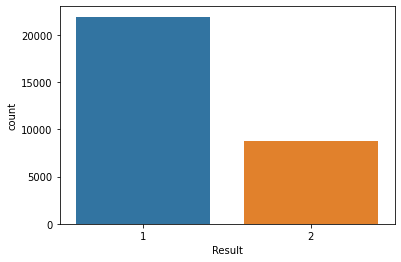

In [9]:
sns.countplot(data=liver_df, x = 'Result', label='Count')

LD, NLD = liver_df['Result'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Gender plot

Number of patients that are male:  21986
Number of patients that are female:  7803


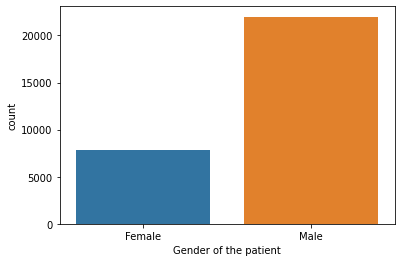

In [10]:
sns.countplot(data=liver_df, x = 'Gender of the patient', label='Count')

M, F = liver_df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Plot to see age vs gender

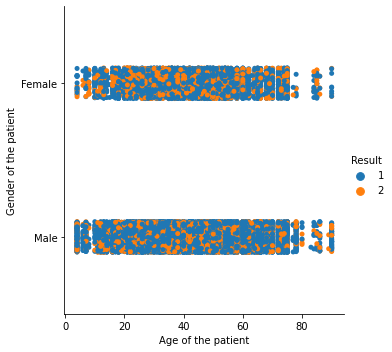

In [11]:
sns.catplot(x="Age of the patient", y="Gender of the patient", hue="Result", data=liver_df)

Mean age of patients

In [12]:
liver_df[['Gender of the patient', 'Result','Age of the patient']].groupby(['Result','Gender of the patient'], as_index=False).mean().sort_values(by='Result', ascending=False)

,Result,Gender of the patient,Age of the patient
2,2,Female,43.068889
3,2,Male,44.309737
0,1,Female,43.291014
1,1,Male,44.502097


Plot of age vs gender. More clear view

Text(0.5, 0.98, 'Disease by Gender and Age')

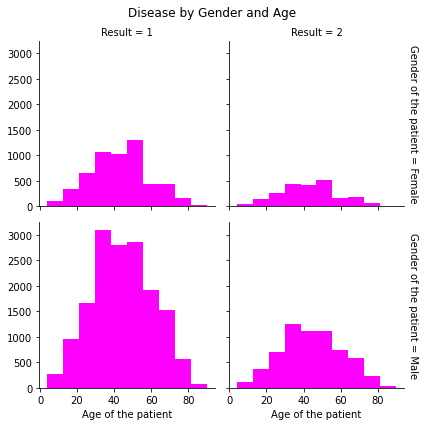

In [13]:
g = sns.FacetGrid(liver_df, col="Result", row="Gender of the patient", margin_titles=True)
g.map(plt.hist, "Age of the patient", color="magenta")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

Plotting Gender(Male/Female) with attributes Total_Bilirubin and Direct_Bilirubin, since the liver has direct relation to bilirubin.

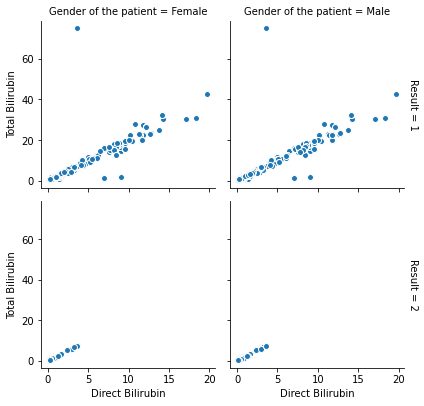

In [14]:
g = sns.FacetGrid(liver_df, col="Gender of the patient", row="Result", margin_titles=True)
g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

Total_Bilirubin vs Direct_Bilirubin

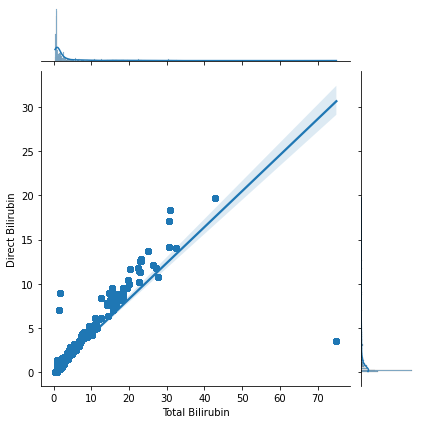

In [15]:
sns.jointplot("Total Bilirubin", "Direct Bilirubin", data=liver_df, kind="reg")

In [16]:
liver_df.head(3)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1


In [17]:
pd.get_dummies(liver_df['Gender of the patient'], prefix = 'Gender of the patient').head()

,Gender of the patient_Female,Gender of the patient_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender of the patient'], prefix = 'Gender of the patient')], axis=1)

In [19]:
liver_df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1


In [20]:
liver_df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000,30691.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882,0.254244,0.716366
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841,0.435442,0.450768
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000,0.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [21]:
liver_df[liver_df['A/G Ratio Albumin and Globulin Ratio'].isnull()]

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
209,45.0,Female,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,1,0
241,51.0,Male,0.8,0.2,230.0,24.0,46.0,6.5,3.1,NaN,1,0,1
253,35.0,Female,0.6,0.2,180.0,12.0,15.0,5.2,2.7,NaN,2,1,0
312,27.0,Male,1.3,0.6,106.0,25.0,54.0,8.5,4.8,NaN,2,0,1
792,73.0,Male,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30606,50.0,Male,1.2,0.4,160.0,20.0,22.0,NaN,NaN,NaN,2,0,1
30607,70.0,Male,0.6,0.1,196.0,29.0,30.0,NaN,NaN,NaN,1,0,1
30634,33.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,NaN,NaN,1,0,1
30635,65.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,NaN,NaN,1,0,1


In [22]:
X = liver_df.drop(['Gender of the patient','Result'], axis=1)
X.head(3)

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1


In the dataset, value 1 implies liver disease, value 2 implies no liver disease.

In [23]:
y = liver_df['Result']

In [24]:
liver_corr = X.corr()
liver_corr

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male
Age of the patient,1.000000,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.018056,-0.032162,0.033836
Total Bilirubin,-0.001600,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197978,-0.012446,0.013470
Direct Bilirubin,-0.001521,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.189414,-0.011069,0.010978
Alkphos Alkaline Phosphotase,-0.000761,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.228583,-0.006365,0.009340
Sgpt Alamine Aminotransferase,0.000659,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002433,-0.003460,0.002105
Sgot Aspartate Aminotransferase,0.006104,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066912,0.003971,-0.003812
Total Protiens,-0.007951,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.226314,-0.004995,0.005610
ALB Albumin,-0.015164,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.682759,-0.004001,0.001115
A/G Ratio Albumin and Globulin Ratio,-0.018056,-0.197978,-0.189414,-0.228583,-0.002433,-0.066912,0.226314,0.682759,1.000000,-0.000692,-0.002300
Gender of the patient_Female,-0.032162,-0.012446,-0.011069,-0.006365,-0.003460,0.003971,-0.004995,-0.004001,-0.000692,1.000000,-0.927931


Heatmap for Correlations between all the features.

Text(0.5, 1.0, 'Correlation between all the features')

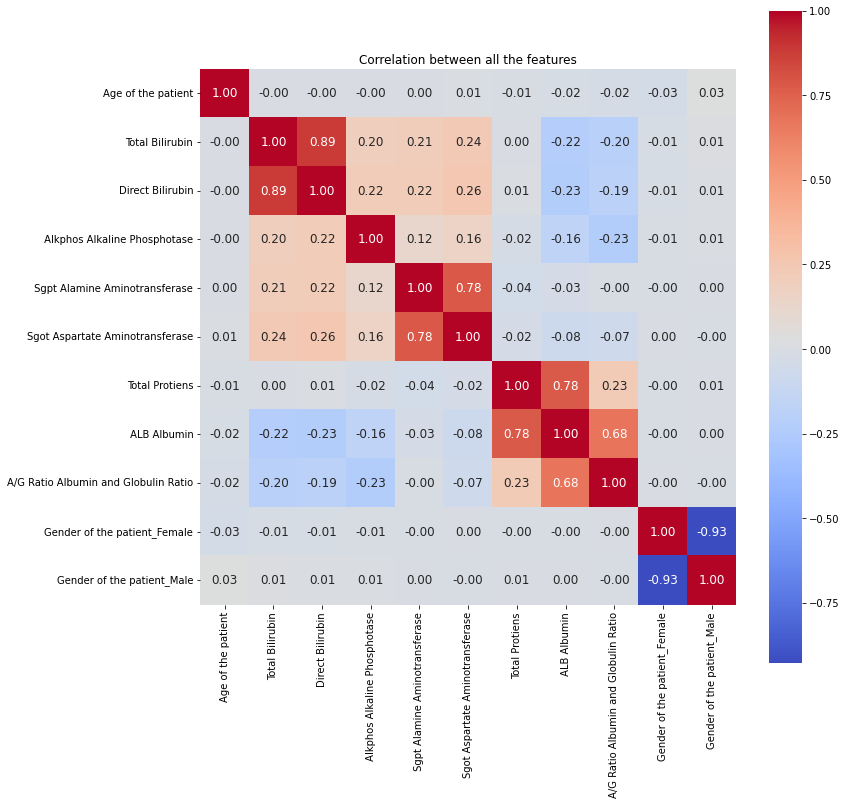

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

Splitting dataset.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(9207, 11)
(9207,)
(21484, 11)
(21484,)


In [27]:
liver_df = liver_df.dropna()

In [28]:
y_test = np.nan_to_num(y_test)

In [29]:
X_test = np.nan_to_num(X_test)

In [30]:
X_train = np.nan_to_num(X_train)

In [31]:
y_train = np.nan_to_num(y_train)

# Random Forest

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 99.99
Random Forest Test Score: 
 99.57
Accuracy: 
 0.9957177434369764
[[15373    31]
 [   61  6019]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15404
           2       0.99      0.99      0.99      6080

    accuracy                           1.00     21484
   macro avg       1.00      0.99      0.99     21484
weighted avg       1.00      1.00      1.00     21484



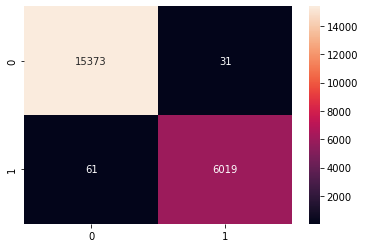

In [33]:
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

# Gaussian NB

In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

Gaussian Score: 
 56.51
Gaussian Test Score: 
 56.4
Accuracy: 
 0.5640011171104078
[[6294 9110]
 [ 257 5823]]
              precision    recall  f1-score   support

           1       0.96      0.41      0.57     15404
           2       0.39      0.96      0.55      6080

    accuracy                           0.56     21484
   macro avg       0.68      0.68      0.56     21484
weighted avg       0.80      0.56      0.57     21484



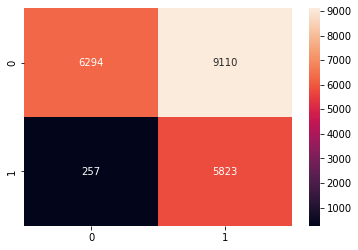

In [38]:
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")